In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sks

In [2]:
data = pd.read_csv("Crop_recommendation.csv")
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
d={"rice": 0, "maize":1,"chickpea":2,"kidneybeans":3,"pigeonpeas":4,"mothbeans":5,"mungbean":6,"blackgram":7,"lentil":8,"pomegranate":9,"banana":10,"mango":11,"grapes":12,"watermelon":13,"muskmelon":14,"apple":15,"orange":16,"papaya":17,"coconut":18,"cotton":19,"jute":20,"coffee":21}

In [4]:
def tell_key(v):
    k = list(d.values()).index(v)
    return list(d.keys())[k]

In [5]:
data["label"] = data["label"].map(d)

In [6]:
data

N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536      0
1      85  58  41    21.770462  80.319644  7.038096  226.655537      0
2      60  55  44    23.004459  82.320763  7.840207  263.964248      0
3      74  35  40    26.491096  80.158363  6.980401  242.864034      0
4      78  42  42    20.130175  81.604873  7.628473  262.717340      0
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507     21
2196   99  15  27    27.417112  56.636362  6.086922  127.924610     21
2197  118  33  30    24.131797  67.225123  6.362608  173.322839     21
2198  117  32  34    26.272418  52.127394  6.758793  127.175293     21
2199  104  18  30    23.603016  60.396475  6.779833  140.937041     21

[2200 rows x 8 columns]

<AxesSubplot: >

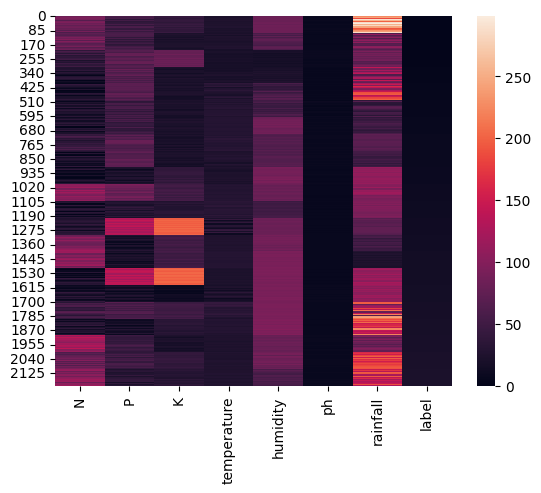

In [7]:
sns.heatmap(data)

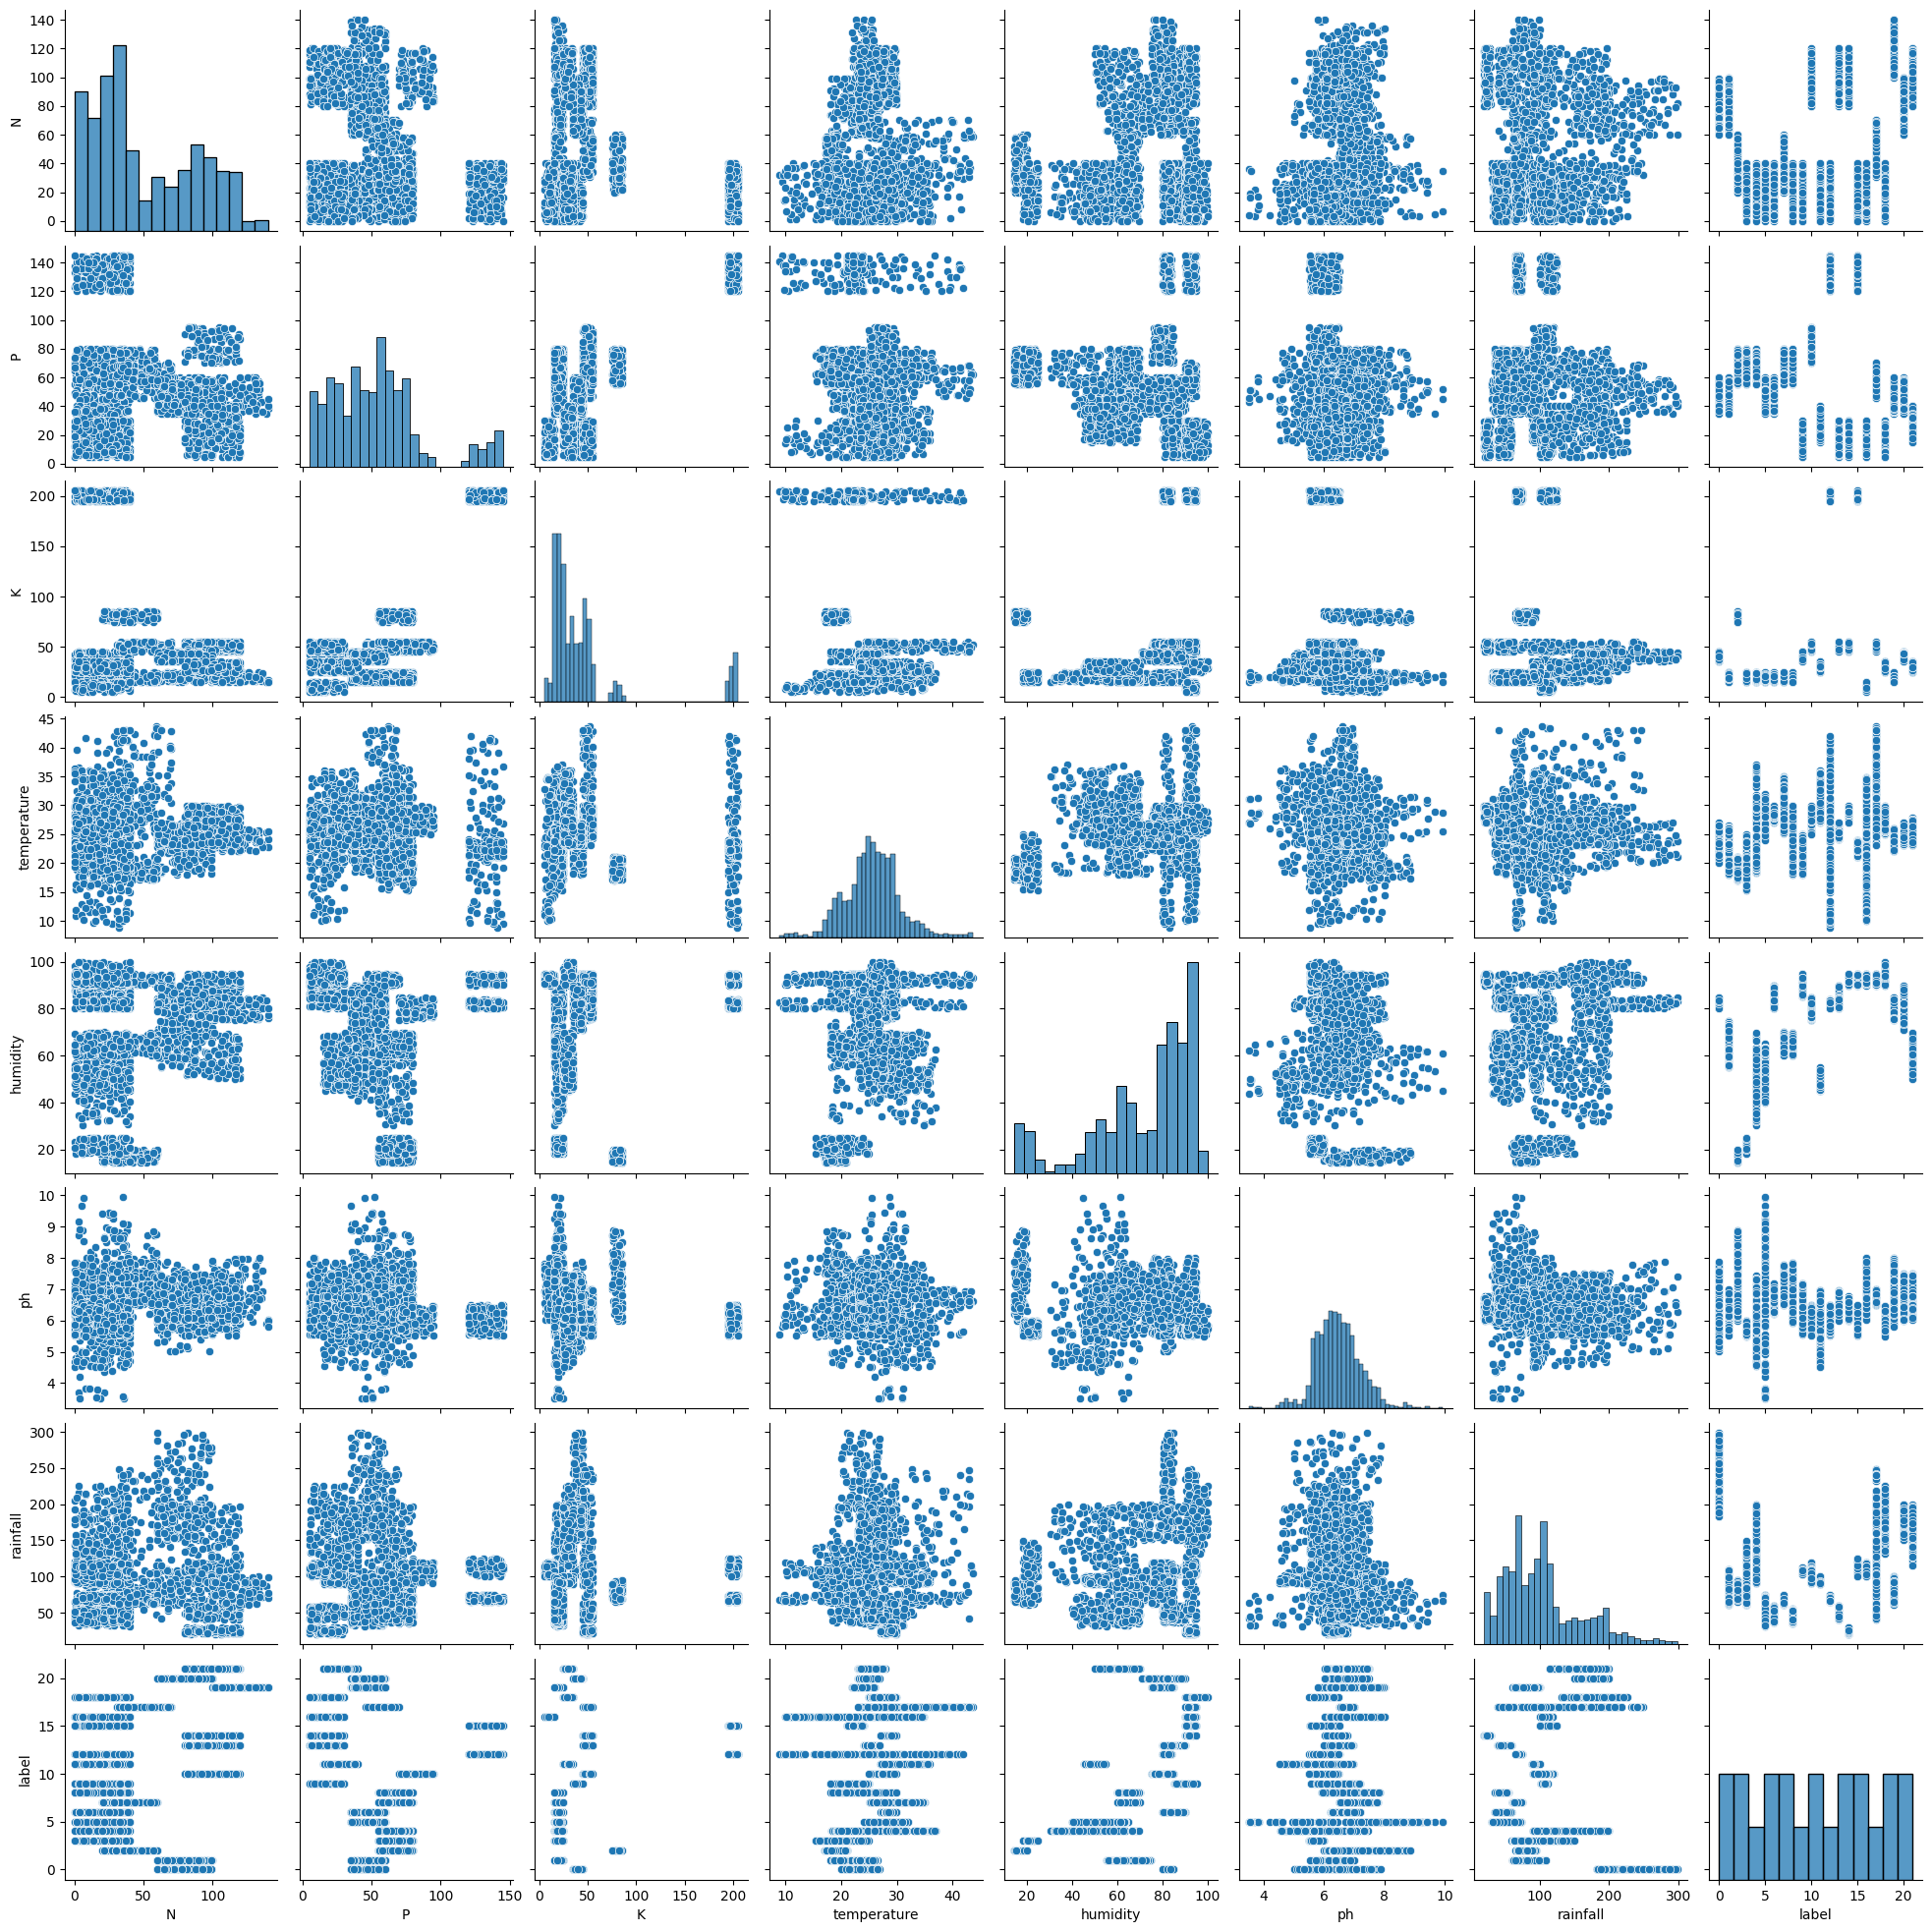

In [7]:
sns.pairplot(data)

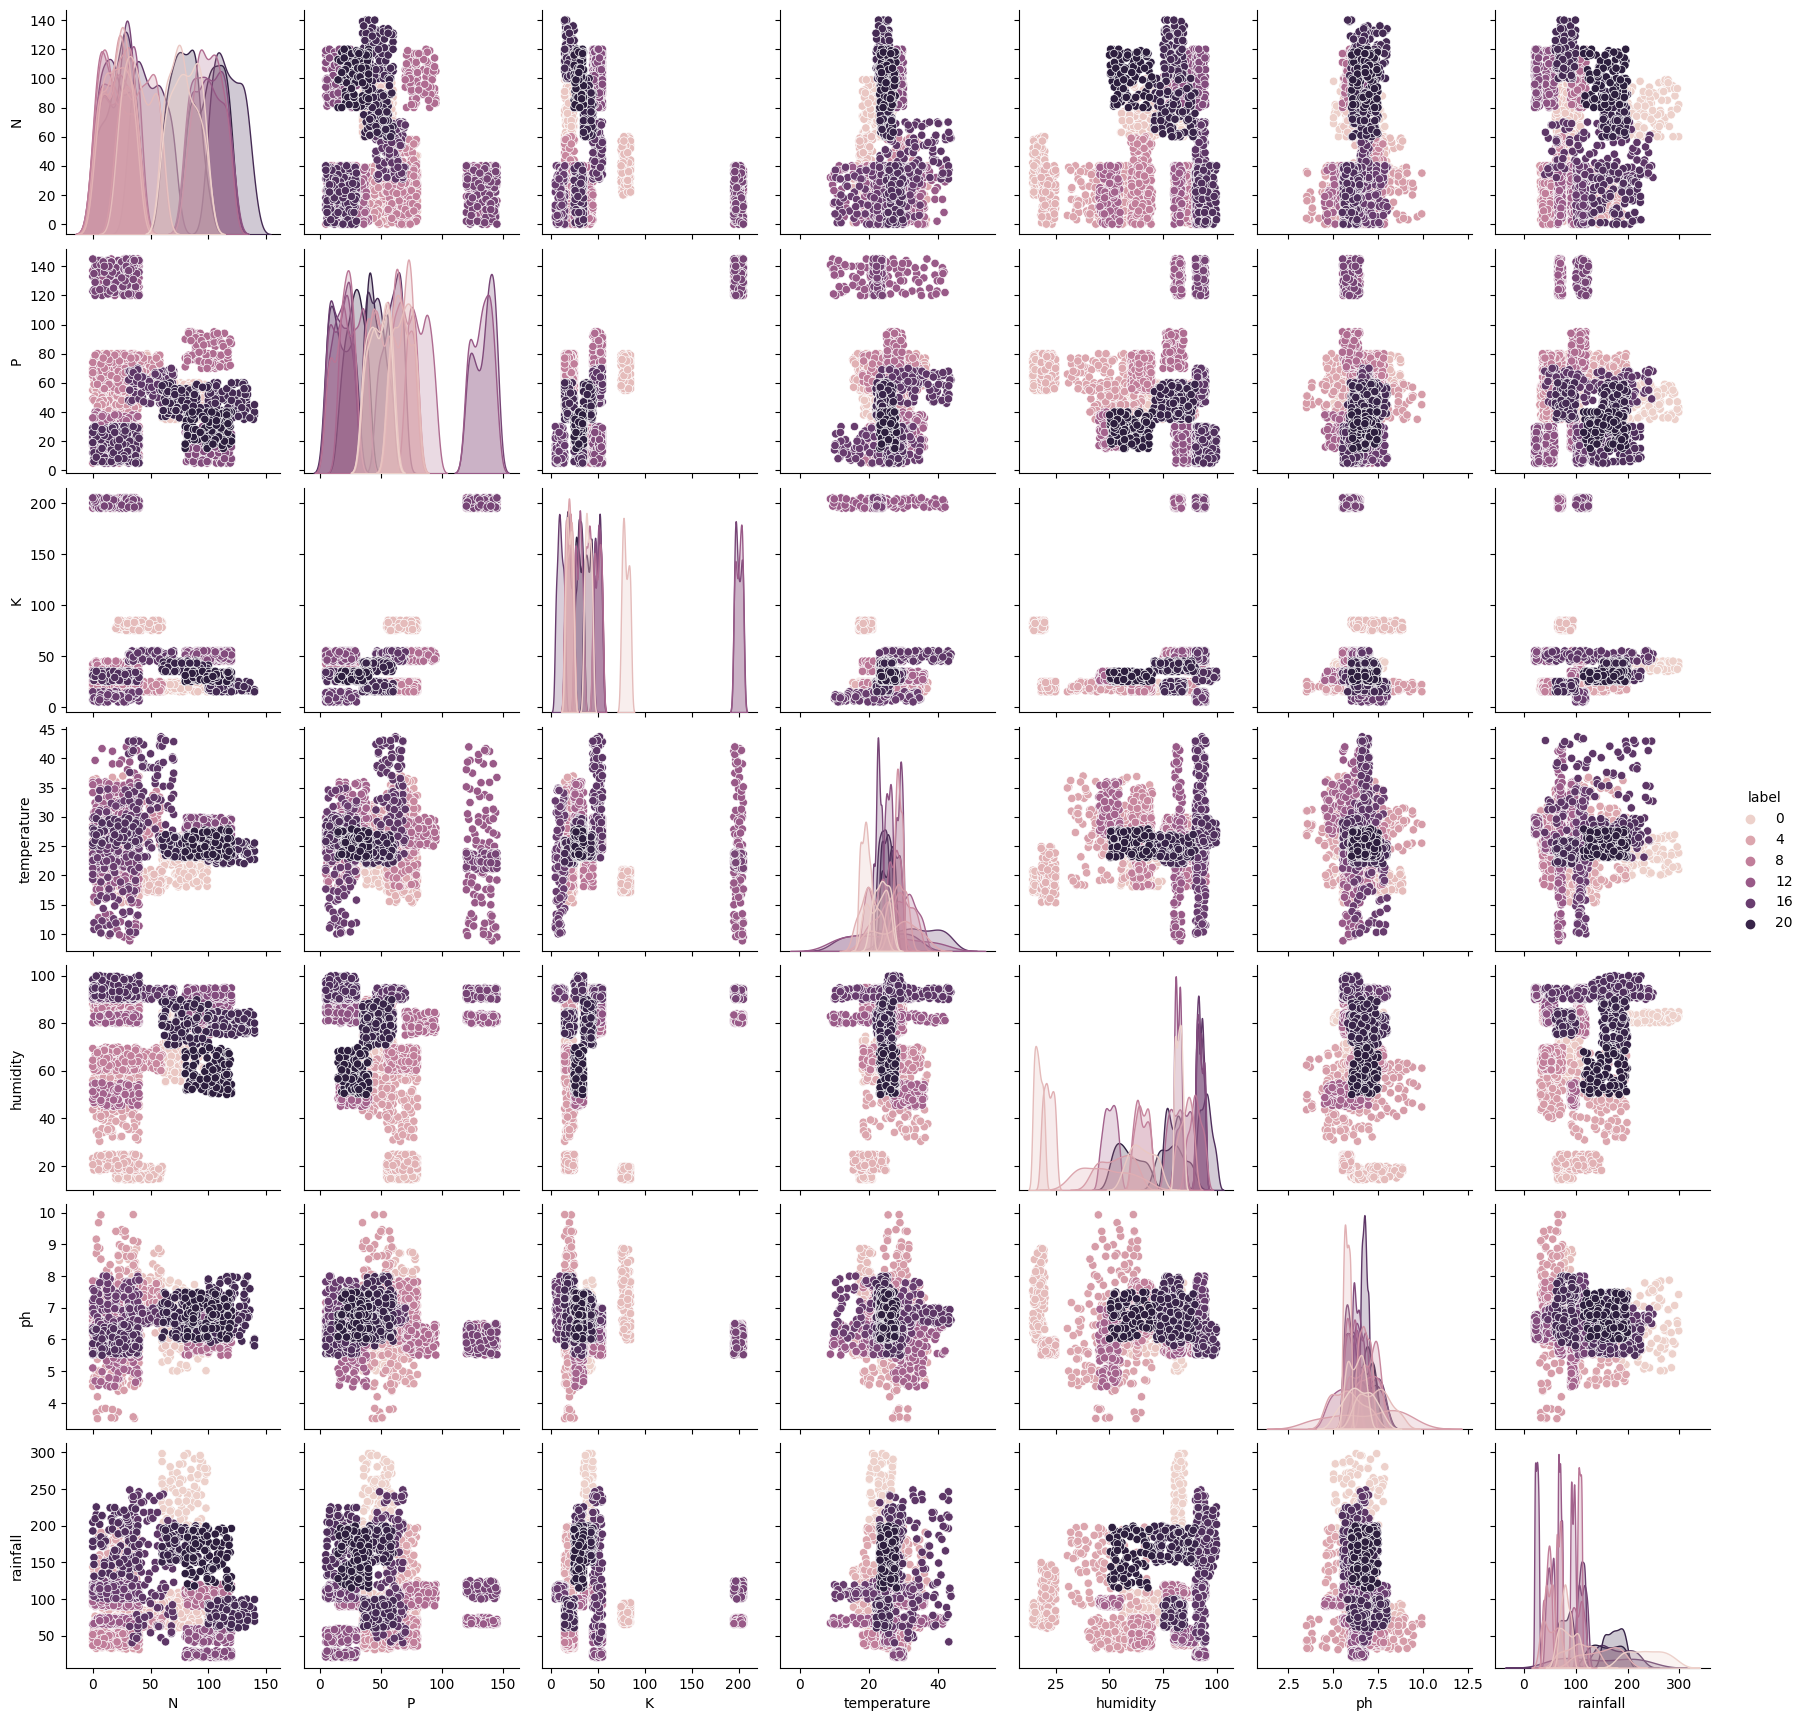

In [8]:
sns.pairplot(data,hue="label")

In [8]:
x = data.drop(columns=['label'])
y=data.label

In [9]:
x

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [10]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [13]:
x_train

N    P    K  temperature   humidity        ph    rainfall
1567   27  120  200    21.452787  90.745319  6.110219  116.703658
2031   81   36   38    23.765547  87.983299  6.334838  150.316615
2073   90   59   35    24.251335  89.864541  7.098228  175.174211
1374   81   16   45    26.904357  86.254262  6.727468   59.759800
279    47   80   77    17.182484  16.428918  7.561108   72.850173
...   ...  ...  ...          ...        ...       ...         ...
1033  102   71   48    28.654563  79.286937  5.695268  102.463378
1731   34   68   51    27.347349  94.177567  6.687088   40.351531
763    35   64   15    28.474423  63.536045  6.500145   69.527441
835    39   65   23    25.434598  69.126134  7.685959   41.026829
1653   14   22    9    17.249446  91.137728  6.543192  112.509052

[1760 rows x 7 columns]

In [15]:
y_train

1567    15
2031    20
2073    20
1374    13
279      2
        ..
1033    10
1731    17
763      7
835      8
1653    16
Name: label, Length: 1760, dtype: int64

In [14]:
x_test

N    P    K  temperature   humidity        ph    rainfall
1320  105   14   50    26.214884  87.688398  6.419052   59.655908
1367   91   12   46    24.644585  85.499382  6.343943   48.312190
1291   14  121  203     9.724458  83.747656  6.158689   74.464111
264    52   73   79    17.257695  18.749440  7.840339   94.002872
728    32   66   17    34.946616  65.267740  7.162358   70.141514
...   ...  ...  ...          ...        ...       ...         ...
446    32   70   20    20.893427  46.248565  6.208843  195.569787
1005   93   94   53    25.866324  84.423793  6.079179  114.535750
1919  117   56   15    25.992374  77.054355  7.368258   89.118821
708    27   64   21    32.842130  68.684015  7.543804   73.671662
1546   31  130  198    21.801298  92.734467  5.554824  120.058667

[440 rows x 7 columns]

In [15]:
y_test

1320    13
1367    13
1291    12
264      2
728      7
        ..
446      4
1005    10
1919    19
708      7
1546    15
Name: label, Length: 440, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled

array([[-0.64463185,  2.00512125,  2.96466347, ...,  0.86301256,
        -0.4785779 ,  0.23692732],
       [ 0.81334894, -0.52889759, -0.2035231 , ...,  0.7381018 ,
        -0.18240887,  0.84590226],
       [ 1.05634574,  0.1649409 , -0.26219322, ...,  0.82317986,
         0.82415091,  1.29625399],
       ...,
       [-0.42863469,  0.31577536, -0.65332736, ..., -0.36751109,
         0.03555503, -0.61777686],
       [-0.32063612,  0.34594225, -0.4968737 , ..., -0.11470255,
         1.59909782, -1.13413007],
       [-0.99562722, -0.95123406, -0.7706676 , ...,  0.880759  ,
         0.09231399,  0.1609325 ]])

In [16]:
y_train_scaled = y_train.to_numpy()
y_test_scaled = y_test.to_numpy()

In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [183]:
model = Sequential()

model.add(Dense(100,activation="relu",input_dim=7))
model.add(Dense(50,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(22,activation="softmax"))

In [184]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               800       
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 25)                1275      
                                                                 
 dense_29 (Dense)            (None, 22)                572       
                                                                 
Total params: 7,697
Trainable params: 7,697
Non-trainable params: 0
_________________________________________________________________


In [185]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [186]:
history = model.fit(x_train_scaled,y_train_scaled,epochs=50, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 2s 13ms/step - loss: 2.8586 - accuracy: 0.1321 - val_loss: 2.5893 - val_accuracy: 0.2102
Epoch 2/50
44/44 [==============================] - 0s 6ms/step - loss: 2.2845 - accuracy: 0.3295 - val_loss: 1.8873 - val_accuracy: 0.5227
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 1.5450 - accuracy: 0.6186 - val_loss: 1.1499 - val_accuracy: 0.7131
Epoch 4/50
44/44 [==============================] - 0s 5ms/step - loss: 0.8577 - accuracy: 0.8040 - val_loss: 0.6454 - val_accuracy: 0.8665
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.8878 - val_loss: 0.4255 - val_accuracy: 0.8864
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.9240 - val_loss: 0.3227 - val_accuracy: 0.9091
Epoch 7/50
44/44 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9446 - val_loss: 0.2622 - val_accuracy: 0.9290
Epoch 8/50
44/44 [=

In [187]:
y_prob = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [189]:
y_pred = y_prob.argmax(axis=1)

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.09318181818181819

In [191]:
import matplotlib.pyplot as plt

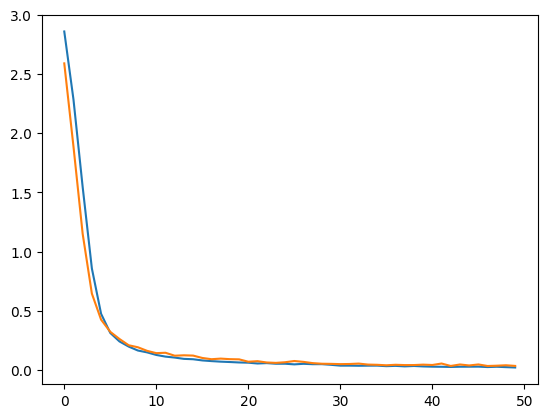

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

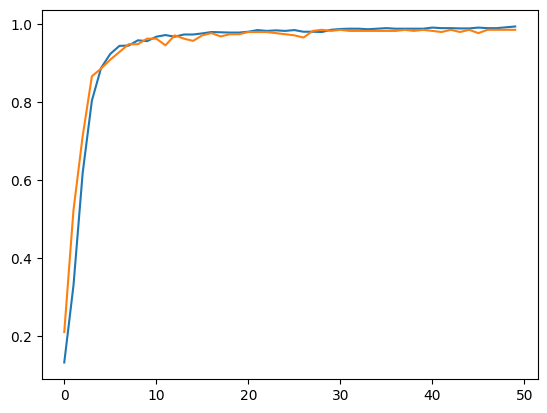

In [193]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [52]:
number = model.predict(x_test_scaled[[78]]).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


In [53]:
print("The actual crop is:",tell_key(number[0]))

The actual crop is: jute


In [54]:
print("The best crop on this field is:",tell_key(y_test_scaled[78]))

The best crop on this field is: jute


# KNN

In [197]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)


In [198]:
model2.fit(x_train_scaled,y_train_scaled)

KNeighborsClassifier()

In [199]:
y_pred = model2.predict(x_test_scaled)

In [200]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [201]:
accuracy_score(y_test_scaled,y_pred)

0.9772727272727273

# svm

In [55]:
from sklearn import svm

In [56]:
clf = svm.SVC()
clf.fit(x_train_scaled,y_train_scaled)

SVC()

In [57]:
y_pred = clf.predict(x_test_scaled)

In [58]:
accuracy_score(y_test_scaled,y_pred)

0.9772727272727273

# Random Forest

In [244]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
r = RandomForestClassifier()  

In [250]:
r.fit(x_train_scaled, y_train_scaled)

RandomForestClassifier(n_estimators=80)

In [253]:
y_pred = r.predict(x_test_scaled)

In [252]:
accuracy_score(y_test_scaled,y_pred)

0.04090909090909091

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [227]:
t = DecisionTreeClassifier()

In [232]:
t.fit(x_train_scaled,y_train_scaled)

DecisionTreeClassifier()

In [233]:
y_pred = t.predict(x_test_scaled)

In [234]:
accuracy_score(y_test_scaled,y_pred)

0.9886363636363636